In [3]:
#Amitava Chakraborty - 21st Dec 2019
#Issue : After around 4000 rolls, the sequence repeats. 
#So if you roll the same dice over 4000 times, the pattern repeats and thus is no longer random. 
#The circuit uses only 5 qubits, the app doesn't support a die larger than 32 sides. 

from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-04-06 16:04:41,147: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
import numpy as np
import math
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')

During measurement each qubit becomes a bit - allowing one to implement "Hello, World!" directly on a quantum computer.
But in practice, ASCII encoding of "Hello, World!" requires over 100 bits, i.e., over 100 qubits. 
We do not have so many qubits yet in current quantum devices.

But we can write two ASCII characters - they require a total of (8+8) 16 (qu)bits. 

The string corresponding to ;) is
    
    ;) =  '0011101100101001'

To prepare this state we can perform an *X* on qubits 0, 3, 5, 8, 9, 11, 12, 13 (number the bits from 0 to 15, from right to left).

We can also prepare a superposition of two different emoticons. 
We choose ;) and 8), which correspond to the bit strings

    8) = '0011100000101001'
    ;) = '0011101100101001'
the two strings differ only on bits 8 and 9. 
or  

    :D = '0011101001000100'
    :) = '0011101000101001'
the two strings differ only on bits 0, 2, 3, 5, 6.

We need to create a superposition on only the bits which are different.
The superposition will be of the '00' of 8), and the '11' of ;) - a standard Bell state.

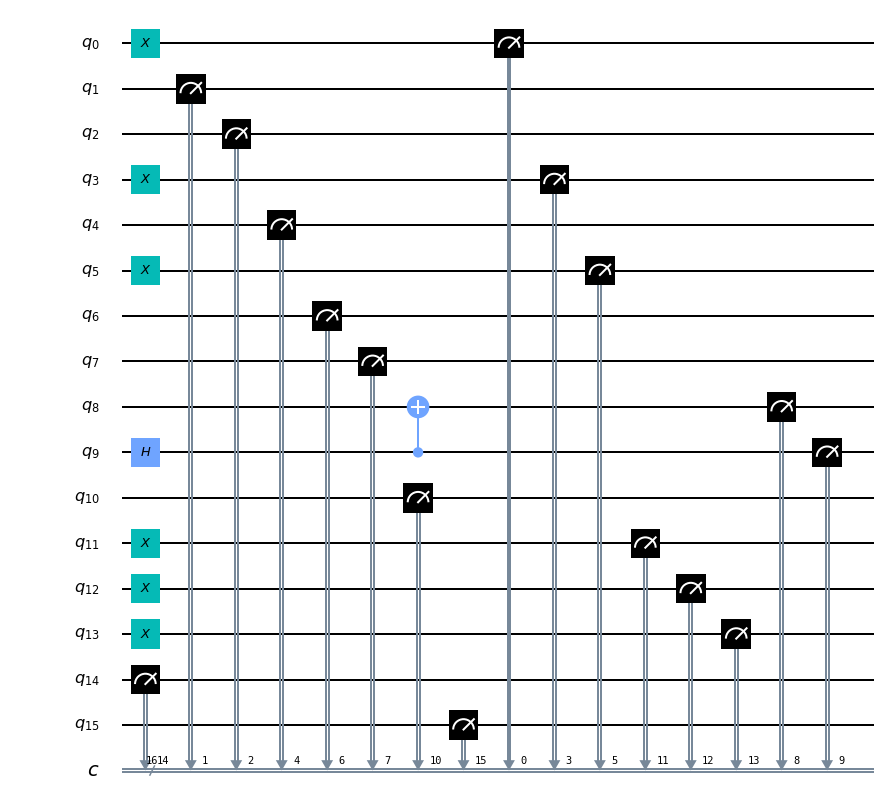

In [12]:
qc = QuantumCircuit(16,16)

# rightmost eight (qu)bits have ')' = 00101001
qc.x(0)
qc.x(3)
qc.x(5)

# second eight (qu)bits have superposition of
# '8' = 00111000
# ';' = 00111011
# these differ only on the rightmost two bits
qc.h(9) # create superposition on 9
qc.cx(9,8) # spread it to 8 with a cnot
qc.x(11)
qc.x(12)
qc.x(13)

# measure
for j in range(16):
    qc.measure(j,j)
qc.draw('mpl')

In [13]:
# run and get results
results = execute(qc, backend, shots=1024).result()
stats = results.get_counts()
print(stats)

{'0011100000101001': 498, '0011101100101001': 526}


To make the emoticon, we convert the bit strings into ASCII characters. We also calculate the fraction of shots for which each result occurred. This gives us a list of characters and probabilities. Next we use matplotlib to create an image in which the all the characters included in the result are printed on top of each other. The alpha channel of each character is set to the fraction of shots for which that result occurred. Ideally this should be equally split between 8) and ;), but noise will also print some other stuff for runs on the real device.

0.494140625	8)
0.505859375	;)


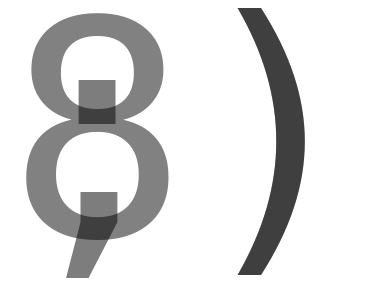

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='monospace')
for bitString in stats:
    char = chr(int( bitString[0:8] ,2)) # get string of the leftmost 8 bits and convert to an ASCII character
    char += chr(int( bitString[8:16] ,2)) # do the same for string of rightmost 8 bits, and add it to the previous character
    prob = stats[bitString] / 1024 # fraction of shots for which this result occurred
    # create plot with all characters on top of each other with alpha given by how often it turned up in the output
    plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)
    if (prob>0.05): # list prob and char for the dominant results (occurred for more than 5% of shots)
        print(str(prob)+"\t"+char)
plt.axis('off')
plt.show()